Reading Data & Statistics


In [114]:
# Readingdata
import pandas as pd
dataset=pd.read_csv("newdata.csv")

In [115]:
# Size
print(dataset)

                                                   text  label
0                                This song is LEGANDARY      1
1                                             Nice song      1
2     billion views face with raised eyebrow this so...      1
3                                            Nice video      1
4     Who else imagined themselves being Justin beib...      1
...                                                 ...    ...
1051                      At it says I be watching porn      3
1052                            I don t like you at all      3
1053                                         disturbing      3
1054            I came here only for dislake this video      3
1055  we don t wanna see them do unholy things like ...      3

[1056 rows x 2 columns]


<FreqDist with 3 samples and 1056 outcomes>


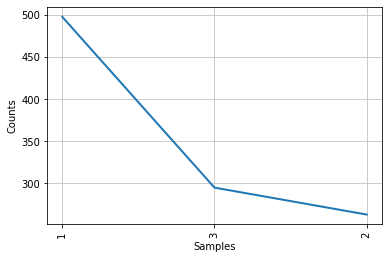

In [116]:
# Label count of type
fdist = FreqDist(dataset.label)
print(fdist)
fdist.plot(10)

In [117]:
# StatisticsFunction
from nltk.probability import FreqDist
def stat(data):
  new_corpus = []
  for review in data:
      review = review.split()
      new_corpus.extend(review) 
  fdist = FreqDist(new_corpus)
  print(fdist)
  fdist.plot(10)

<FreqDist with 1860 samples and 10676 outcomes>


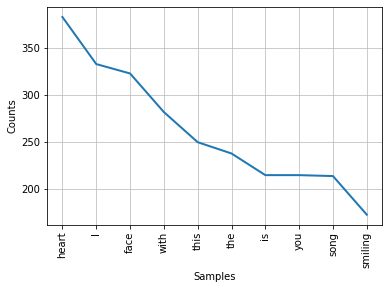

In [118]:
# Text count of word
stat(dataset.text)

Preprocessing

In [119]:
# Cleaning data
import nltk
import re
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

corpus = []

for review in dataset.values[:,0]:
    review = re.sub("[^a-zA-Z]", " ", review)
    review = re.sub(r'([A-Z])\1+', lambda m: m.group(1),review,flags=re.IGNORECASE)
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if word not in stopwords.words("english")]
    review = " ".join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [127]:
print(corpus[0:10])

['thi song legandari', 'nice song', 'bilion view face rais eyebrow song deserv', 'nice video', 'who els imagin justin beiber sang song bedrom face role eye grine face sweat', 'I love video thi favourit song I love much smile face halo smile face halo smile face halo face steam nose anguish face face blow ki face blow ki face blow ki face blow ki grine cat face smile eye money bag money bag money bag briefcas glase crown graduat cap', 'damn two bilion view lok god man', 'justin voic god inhuman', 'heart ribon heart ribon heart ribon heart ribon heart ribon heart ribon heart ribon heart ribon heart ribon heart ribon heart ribon heart ribon heart ribon heart ribon heart ribon heart ribon heart ribon heart ribon heart ribon heart ribon heart ribon heart ribon heart ribon heart ribon heart ribon heart ribon heart ribon heart ribon heart ribon belhop bel', 'red heart plead face']


<FreqDist with 1281 samples and 7081 outcomes>


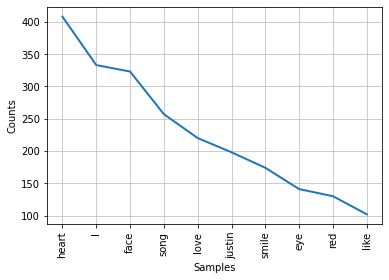

In [121]:
stat(corpus)

In [122]:
# Convert to vector
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1000)
X = cv.fit_transform(corpus)
X = X.todense()

In [123]:
print(X[0])

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

Building Model

In [124]:
# Trainning model with cross validation
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedShuffleSplit

Y = dataset.iloc[:,1].values
sss = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
sss.get_n_splits(X,Y)

maxscore_1 = 0
maxscore_2 = 0
trainset1 = []
testset1 = []
trainset2 = []
testset2 = []
for train_index, test_index in sss.split(X,Y):
      X_train, X_test = X[train_index], X[test_index]
      Y_train, Y_test = Y[train_index], Y[test_index]

      model_1 = LogisticRegression(random_state=0)
      model_1.fit(X_train, Y_train)
    
      model_2 = SVC(kernel='linear')
      model_2.fit(X_train, Y_train)
      
      if (maxscore_1 < model_1.score(X_test, Y_test)):
          maxscore_1 = model_1.score(X_test, Y_test)
          trainset1 = [train_index] 
          testset1 = [test_index]
      if (maxscore_2 < model_2.score(X_test, Y_test)):
          maxscore_2 = model_2.score(X_test, Y_test)
          trainset2 = [train_index]
          testset2 = [test_index]
          
      print("Logistic")
      print(model_1.score(X_train, Y_train))
      print(model_1.score(X_test, Y_test))
      
      print("Support Vector Machine")
      print(model_2.score(X_train, Y_train))
      print(model_2.score(X_test, Y_test))
      

Logistic
0.9727488151658767
0.8113207547169812
Support Vector Machine
0.9739336492890995
0.8207547169811321
Logistic
0.9691943127962085
0.7830188679245284
Support Vector Machine
0.9774881516587678
0.7783018867924528
Logistic
0.9774881516587678
0.7311320754716981
Support Vector Machine
0.9834123222748815
0.7311320754716981
Logistic
0.9727488151658767
0.8113207547169812
Support Vector Machine
0.9786729857819905
0.7783018867924528
Logistic
0.9691943127962085
0.7924528301886793
Support Vector Machine
0.981042654028436
0.7594339622641509
Logistic
0.9680094786729858
0.7735849056603774
Support Vector Machine
0.9739336492890995
0.7641509433962265
Logistic
0.9715639810426541
0.7924528301886793
Support Vector Machine
0.9739336492890995
0.7783018867924528
Logistic
0.9739336492890995
0.8018867924528302
Support Vector Machine
0.9798578199052133
0.7877358490566038
Logistic
0.9751184834123223
0.8018867924528302
Support Vector Machine
0.9834123222748815
0.7830188679245284
Logistic
0.9691943127962085
0

In [ ]:
print(testset1)
print(testset2)

[array([ 730,  572,  591,  358,  127,  974,  911,  285,  404,  581,  544,
        731,  211,  520,  458, 1019,  954,  969,  735,  739,  877,  823,
         25,  910,  452,   39,  876,  420,  968,  630,  941,  915,  174,
       1050,  840,   28,  589,  742,  942,  856,  621,  918,   31,  901,
        881,  468,  770,    9,  192,  119,  549,  798,  265,  147,   84,
        681,  481,  716,  185,  845,  496,  643,  449,  323,  183,  121,
        820,  243,  837, 1053, 1054,  997,   91,  356,  290,  702,  431,
        557, 1045,  896,  888,  195,  873,  530,   70,  244, 1035,  596,
        273,  904,  359,  774,  484,  822,  905,  594,  131,  919,  337,
        844,  828,  670,  423,  585,  335,  277,  809,  105,  662,  676,
        692,  761, 1002,  446,  661,  388,  571,  677,  165,  177,  696,
        338,  242,  808,  607,  613,  801,  835,  976,  292,  841,  117,
        389,  861,   47,  472,  203,  752,  128,  524,  703,  683,  617,
        444,   88,  688,  398,  587,  983,  465,  

In [ ]:
# Building Model
X_train, X_test= X[trainset1], X[testset1]
Y_train, Y_test= Y[trainset1], Y[testset1]

model_1 = LogisticRegression(random_state=0)
model_1.fit(X_train, Y_train)   
model_2 = SVC(kernel='linear')
model_2.fit(X_train, Y_train)

/usr/local/lib/python3.6/dist-packages/numpy/matrixlib/defmatrix.py:195: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = N.ndarray.__getitem__(self, index)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  This is separate from the ipykernel package so we can avoid doing imports until


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Result

In [ ]:
# Score
print("Logistic")
print(model_1.score(X_train, Y_train))
print(model_1.score(X_test, Y_test))
print("Support Vector Machine")
print(model_2.score(X_train, Y_train))
print(model_2.score(X_test, Y_test))

logistic
0.9727488151658767
0.8113207547169812
Support Vector Machine
0.9739336492890995
0.8207547169811321


In [ ]:
# Classification Report
y_pred_1 = model_1.predict(X_test)
y_pred_2 = model_2.predict(X_test)
from sklearn.metrics import classification_report
print("Logistic")
print(classification_report(Y_test, y_pred_1, labels=[1, 2, 3]))
print("Support Vector Machine")
print(classification_report(Y_test, y_pred_2, labels=[1, 2, 3]))

              precision    recall  f1-score   support

           1       0.87      0.85      0.86       100
           2       0.76      0.70      0.73        53
           3       0.77      0.85      0.81        59

    accuracy                           0.81       212
   macro avg       0.80      0.80      0.80       212
weighted avg       0.81      0.81      0.81       212

              precision    recall  f1-score   support

           1       0.87      0.86      0.86       100
           2       0.77      0.70      0.73        53
           3       0.78      0.86      0.82        59

    accuracy                           0.82       212
   macro avg       0.81      0.81      0.81       212
weighted avg       0.82      0.82      0.82       212



In [ ]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(Y_test, y_pred_1)
print("Logistic")
print(cm1)
cm2 = confusion_matrix(Y_test, y_pred_2)
print("Support Vector Machine")
print(cm2)

Logistic
[[85  7  8]
 [ 9 37  7]
 [ 4  5 50]]
Support Vector Machine
[[86  7  7]
 [ 9 37  7]
 [ 4  4 51]]
